In [2]:
#upload the files from local
from google.colab import files
uploaded = files.upload()

Saving climate.csv to climate.csv
Saving FAOSTAT_data_en_11-6-2024.csv to FAOSTAT_data_en_11-6-2024.csv
Saving Emissions_FAOSTAT_data_en_12-3-2022.csv to Emissions_FAOSTAT_data_en_12-3-2022.csv
Saving Fertilizers_FAOSTAT_data_en_12-3-2022.csv to Fertilizers_FAOSTAT_data_en_12-3-2022.csv


# Install necessary libraries and Importing libraries

In [3]:
!pip install plotly seaborn statsmodels scipy scikit-learn
import numpy as np
import pandas as pd
import functools
from datetime import date
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [4]:
import pandas as pd

# Load the CSV file
file_path = '/content/FAOSTAT_data_en_11-6-2024.csv'
df = pd.read_csv(file_path)

# Extract only 'Area harvested' and 'Yield' for the given dataset
annual_potato_statistics = df[df['Element'].isin(['Area harvested', 'Yield'])].pivot_table(
    index='Year',
    columns='Element',
    values='Value',
    aggfunc='first'
).reset_index()

# Remove the column name for cleaner output
annual_potato_statistics.columns.name = None

# Display the resulting DataFrame
print(annual_potato_statistics)


    Year  Area harvested    Yield
0   1961        375000.0   7250.7
1   1962        365000.0   6704.1
2   1963        413000.0   8147.7
3   1964        415000.0   6248.2
4   1965        429000.0   8403.3
..   ...             ...      ...
57  2018       2142000.0  23954.2
58  2019       2173000.0  23097.1
59  2020       2051000.0  23677.2
60  2021       2248000.0  24123.7
61  2022       2226000.0  25236.3

[62 rows x 3 columns]


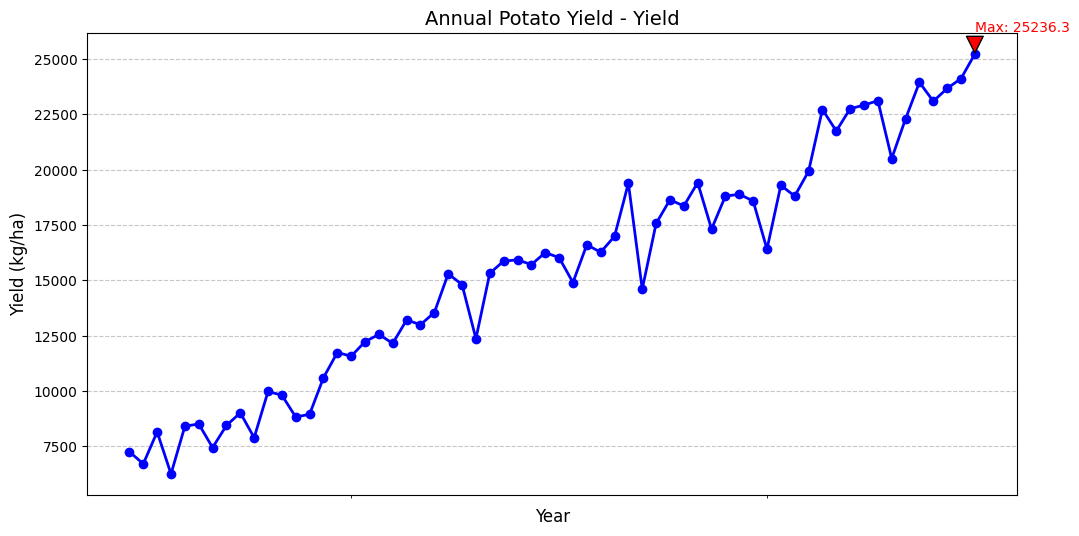

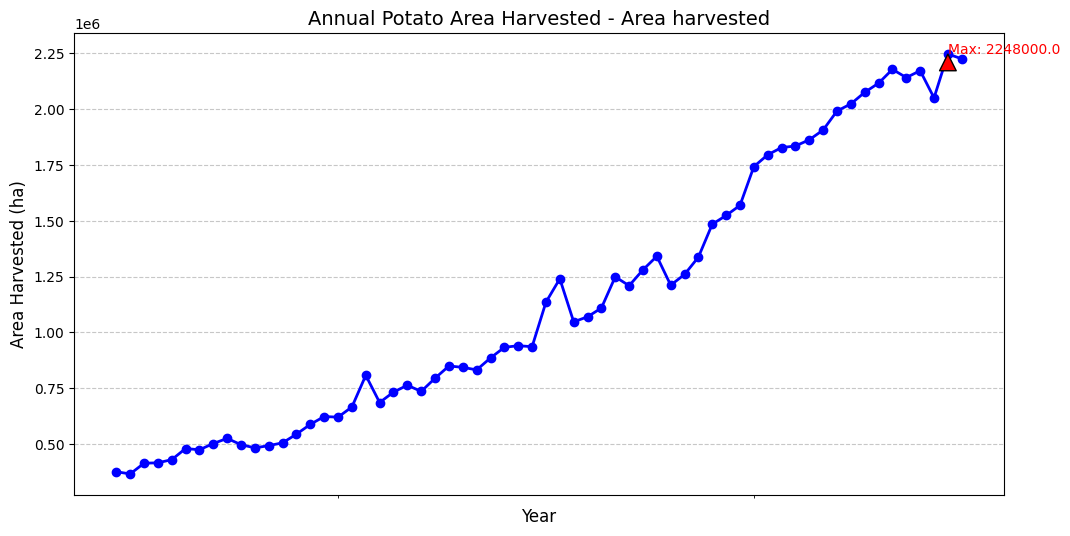

In [5]:
import pylab
import numpy as np
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib import pyplot as plt

# Define a function to show the time series plot with improvements
def show_timeseriesplot(title, var_date, var_data, colname, ylabel):
    years = YearLocator()  # Locator for every year
    months = MonthLocator()  # Locator for every month
    yearsFmt = DateFormatter('%Y')  # Year format

    fig = plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Plot the data with enhanced line width and marker size
    plt.plot(var_date, var_data, marker='o', markersize=6, linestyle='-', linewidth=2, color='blue')

    # Add gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the format for x-axis labels
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    # Add titles and labels
    plt.title(f"{title} - {colname}", fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Year", fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tick_params(axis='both', which='minor', labelsize=8)

    # Highlight key points (optional logic for further emphasis if desired)
    for i, val in enumerate(var_data):
        if val == max(var_data):  # Example: Highlight the maximum value
            plt.annotate(f'Max: {val}', xy=(var_date[i], val), xytext=(var_date[i], val + 1000),
                         arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

    # Display the plot
    plt.show()

# Plotting for 'Yield'
col = 'Yield'
show_timeseriesplot('Annual Potato Yield', annual_potato_statistics['Year'],
                    annual_potato_statistics[col], col, "Yield (kg/ha)")

# Plotting for 'Area harvested'
col = 'Area harvested'
show_timeseriesplot('Annual Potato Area Harvested', annual_potato_statistics['Year'],
                    annual_potato_statistics[col], col, "Area Harvested (ha)")

#Time Series Analysis of Annual Emissions Trends

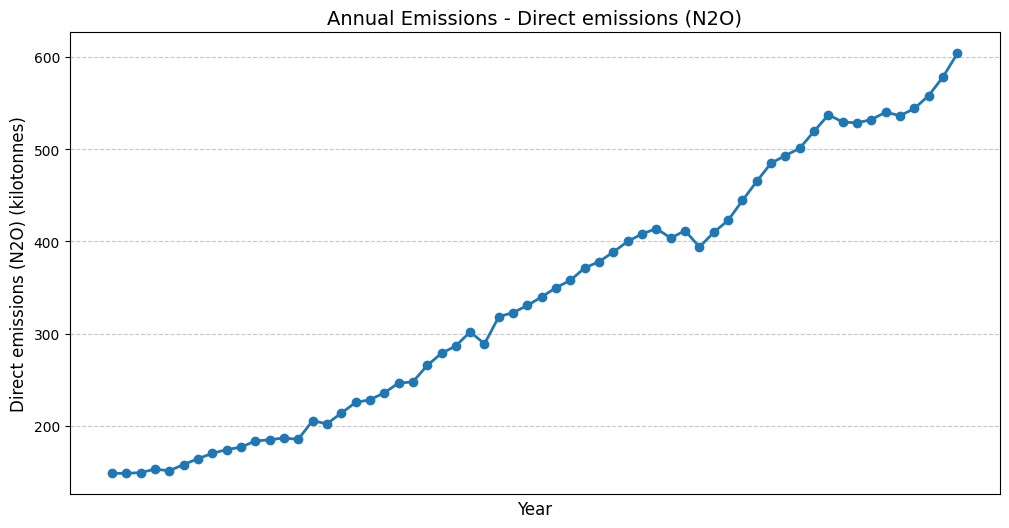

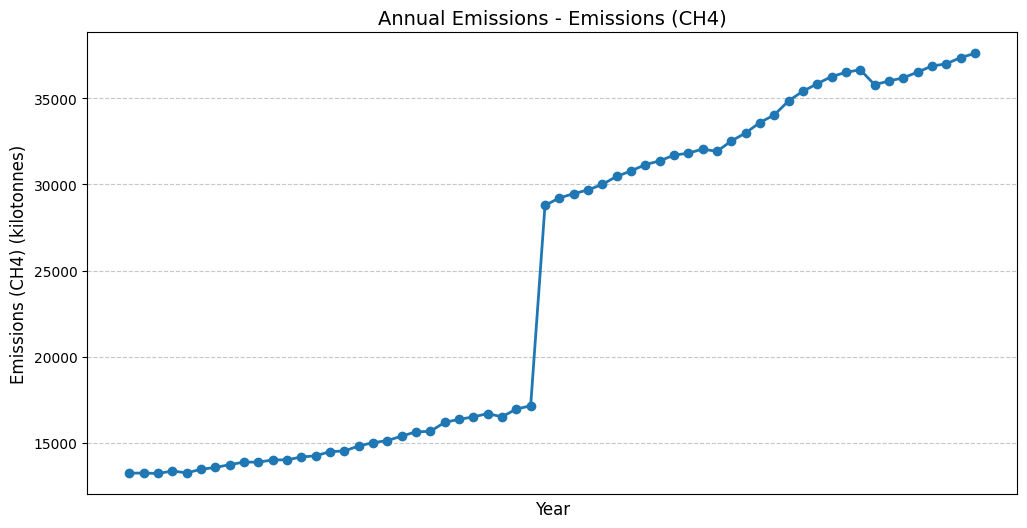

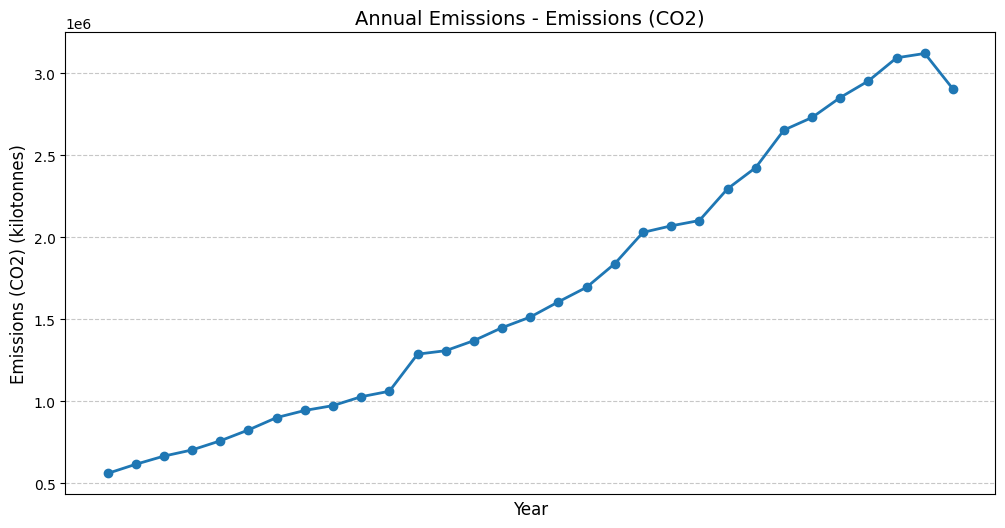

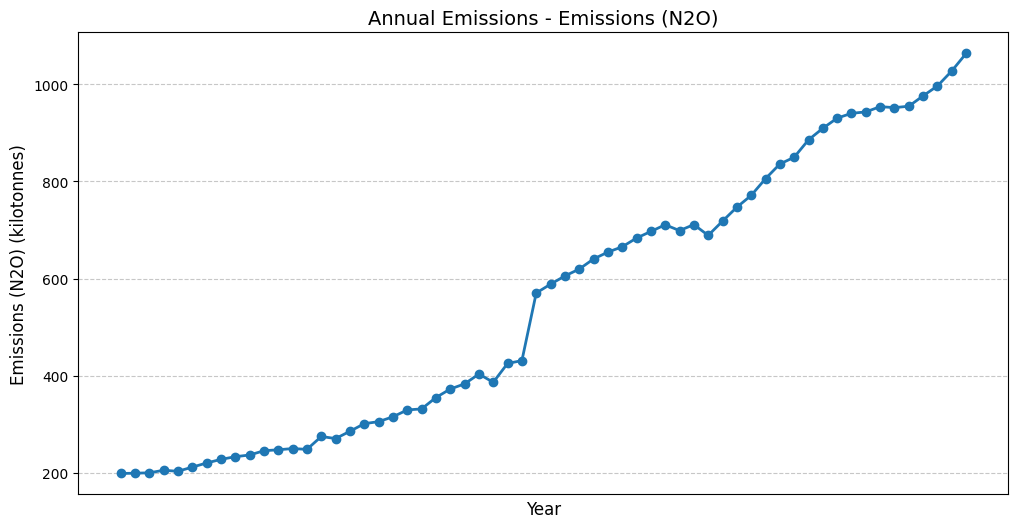

    Year  Direct emissions (N2O)  Emissions (CH4)  Emissions (CO2)  \
0   1961                148.2906       13250.7240              NaN   
1   1962                148.4908       13251.6809              NaN   
2   1963                149.1196       13231.2195              NaN   
3   1964                152.9632       13371.6457              NaN   
4   1965                151.1800       13264.9678              NaN   
5   1966                157.9322       13474.8538              NaN   
6   1967                164.2757       13578.5884              NaN   
7   1968                170.0333       13741.2510              NaN   
8   1969                174.1541       13890.1640              NaN   
9   1970                176.7852       13885.7779              NaN   
10  1971                183.3966       14015.8657              NaN   
11  1972                184.8776       14020.5007              NaN   
12  1973                186.7269       14186.1376              NaN   
13  1974            

In [6]:
import pandas as pd
import pylab
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib import pyplot as plt

# Load emissions data
file_path = '/content/Emissions_FAOSTAT_data_en_12-3-2022.csv'
emissions_data = pd.read_csv(file_path)

# Filter relevant emissions types
relevant_emissions = emissions_data[
    emissions_data['Element'].isin([
        'Direct emissions (N2O)',
        'Emissions (CH4)',
        'Emissions (CO2)',
        'Emissions (N2O)'
    ])
]

# Pivot data to get a cleaner view
annual_emissions_statistics = relevant_emissions.pivot_table(
    index='Year',
    columns='Element',
    values='Value',
    aggfunc='sum'
).reset_index()

# Remove column name and rename DataFrame
annual_emissions_statistics.columns.name = None

# Function to plot time series data
def show_timeseriesplot(title, var_date, var_data, colname, ylabel):
    years = YearLocator()
    yearsFmt = DateFormatter('%Y')

    fig = plt.figure(figsize=(12, 6))
    ax = plt.gca()

    plt.plot(var_date, var_data, marker='o', linestyle='-', linewidth=2, markersize=6)
    plt.grid(True, linestyle='--', alpha=0.7)

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)

    plt.title(f"{title} - {colname}", fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Year", fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

# Plotting each emission variable
for col in ['Direct emissions (N2O)', 'Emissions (CH4)', 'Emissions (CO2)', 'Emissions (N2O)']:
    show_timeseriesplot(
        'Annual Emissions',
        annual_emissions_statistics['Year'],
        annual_emissions_statistics[col],
        col,
        f"{col} (kilotonnes)"
    )

print(annual_emissions_statistics)

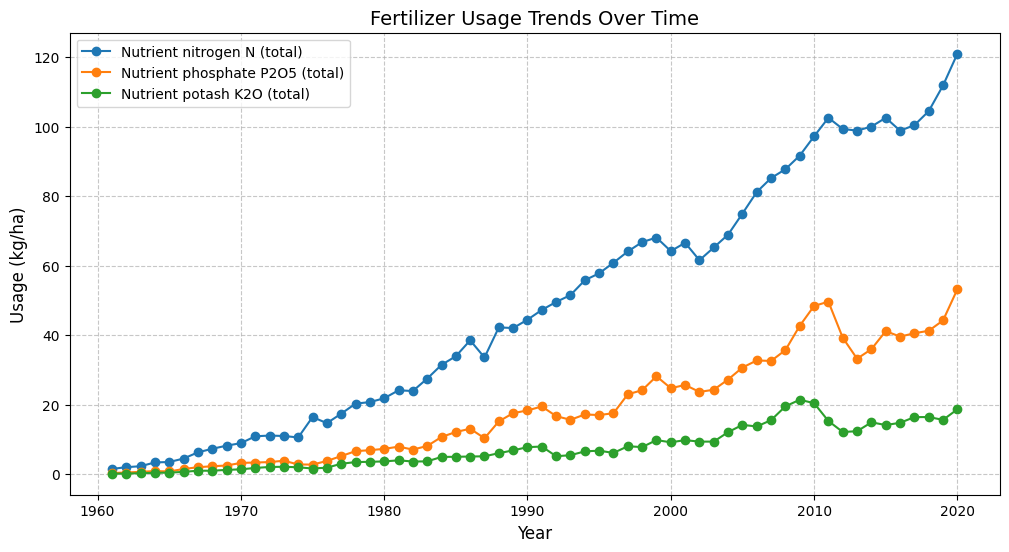

    Year  Nutrient nitrogen N (total)  Nutrient phosphate P2O5 (total)  \
0   1961                         1.55                             0.38   
1   1962                         2.05                             0.51   
2   1963                         2.33                             0.72   
3   1964                         3.42                             0.92   
4   1965                         3.54                             0.82   
5   1966                         4.53                             1.53   
6   1967                         6.32                             2.04   
7   1968                         7.34                             2.32   
8   1969                         8.24                             2.53   
9   1970                         8.96                             3.28   
10  1971                        10.93                             3.39   
11  1972                        11.15                             3.52   
12  1973                        11.02 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns

# Load Fertilizer Usage Data
fertilizers_file_path = '/content/Fertilizers_FAOSTAT_data_en_12-3-2022.csv'
fertilizers_data = pd.read_csv(fertilizers_file_path)

# Filter and pivot the data for analysis
fertilizers_data_filtered = fertilizers_data[fertilizers_data['Element'] == 'Use per area of cropland']
fertilizer_trends = fertilizers_data_filtered.pivot_table(
    index='Year',
    columns='Item',
    values='Value',
    aggfunc='mean'
).reset_index()

# Remove column name for neatness
fertilizer_trends.columns.name = None

# Plot Fertilizer Trends over time
def plot_fertilizer_trends(df, title):
    plt.figure(figsize=(12, 6))
    for column in df.columns[1:]:
        plt.plot(df['Year'], df[column], marker='o', label=column)

    plt.title(title, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Usage (kg/ha)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

plot_fertilizer_trends(fertilizer_trends, "Fertilizer Usage Trends Over Time")
print(fertilizer_trends)

Time Series Analysis of Annual Emissions Trends includes annual mintemp, maxtemp and meantemp and annualprecipitation

In [8]:
import pandas as pd

# Load the climate data CSV file
climate_data_path = '/content/climate.csv'
climate_data = pd.read_csv(climate_data_path)

# Display the first few rows to understand the structure
print("Climate Data Overview:")
display(climate_data.head())

Climate Data Overview:


,Year,precipitation,meantemp,mintemp,maxtemp
0,1961,1175.75,24.13,7.12,39.83
1,1962,1117.62,24.10,7.10,39.73
2,1963,1185.62,23.91,6.58,39.55
3,1964,1150.77,23.85,6.90,39.52
4,1965,1111.10,23.96,6.91,39.59


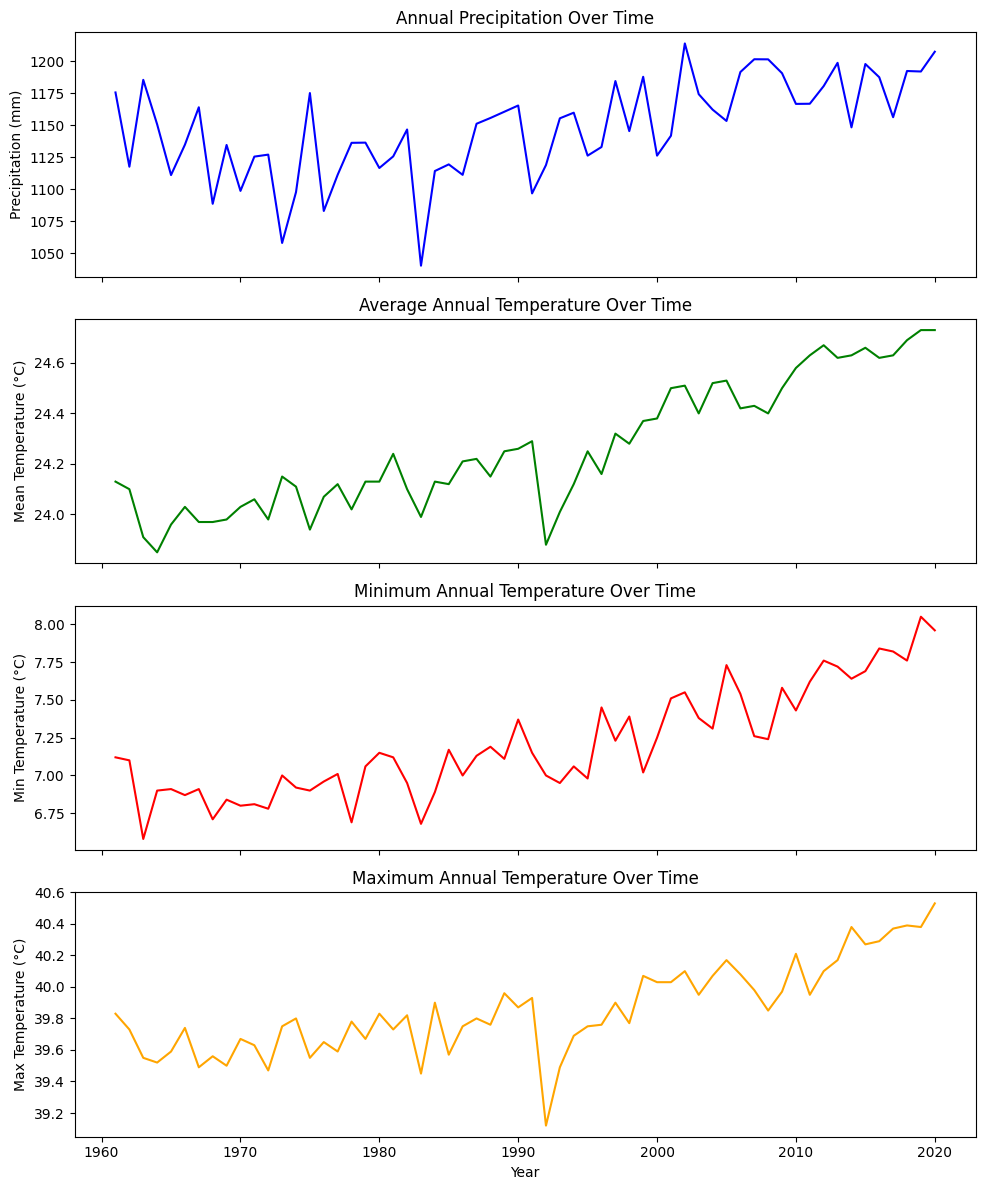

In [9]:
import matplotlib.pyplot as plt

# Set up the plotting area for time series of climate variables
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot each variable against Year
axs[0].plot(climate_data['Year'], climate_data['precipitation'], color='b')
axs[0].set_title("Annual Precipitation Over Time")
axs[0].set_ylabel("Precipitation (mm)")

axs[1].plot(climate_data['Year'], climate_data['meantemp'], color='g')
axs[1].set_title("Average Annual Temperature Over Time")
axs[1].set_ylabel("Mean Temperature (°C)")

axs[2].plot(climate_data['Year'], climate_data['mintemp'], color='r')
axs[2].set_title("Minimum Annual Temperature Over Time")
axs[2].set_ylabel("Min Temperature (°C)")

axs[3].plot(climate_data['Year'], climate_data['maxtemp'], color='orange')
axs[3].set_title("Maximum Annual Temperature Over Time")
axs[3].set_ylabel("Max Temperature (°C)")
axs[3].set_xlabel("Year")

plt.tight_layout()
plt.show()

#Displaying each dataframe that needs to be stitched

In [10]:
# Display annual_potato_statistics
print("Annual Potato Statistics:")
display(annual_potato_statistics)
# Filter the DataFrame to only include rows with Year between 1961 and 2020
annual_potato_statistics = annual_potato_statistics[(annual_potato_statistics['Year'] >= 1961) & (annual_potato_statistics['Year'] <= 2020)]

# Display the fixed DataFrame
print("Fixed Annual Potato Statistics:")
display(annual_potato_statistics)


Annual Potato Statistics:


,Year,Area harvested,Yield
0,1961,375000.0,7250.7
1,1962,365000.0,6704.1
2,1963,413000.0,8147.7
3,1964,415000.0,6248.2
4,1965,429000.0,8403.3
...,...,...,...
57,2018,2142000.0,23954.2
58,2019,2173000.0,23097.1
59,2020,2051000.0,23677.2
60,2021,2248000.0,24123.7


Fixed Annual Potato Statistics:


,Year,Area harvested,Yield
0,1961,375000.0,7250.7
1,1962,365000.0,6704.1
2,1963,413000.0,8147.7
3,1964,415000.0,6248.2
4,1965,429000.0,8403.3
5,1966,479000.0,8509.4
6,1967,473300.0,7440.3
7,1968,501400.0,8441.0
8,1969,524400.0,9011.3
9,1970,496000.0,7888.3


In [11]:
# Display annual_emissions_statistics
print("Annual Emissions Statistics:")
display(annual_emissions_statistics)

# Interpolate missing values linearly
annual_emissions_statistics.interpolate(method='linear', inplace=True)

# Display the fixed DataFrame
print("DataFrame after interpolation:")
display(annual_emissions_statistics)


Annual Emissions Statistics:


,Year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (N2O)
0,1961,148.2906,13250.7240,NaN,199.3069
1,1962,148.4908,13251.6809,NaN,199.7768
2,1963,149.1196,13231.2195,NaN,200.6490
3,1964,152.9632,13371.6457,NaN,205.8260
4,1965,151.1800,13264.9678,NaN,203.7403
5,1966,157.9322,13474.8538,NaN,212.3778
6,1967,164.2757,13578.5884,NaN,220.7971
7,1968,170.0333,13741.2510,NaN,228.3018
8,1969,174.1541,13890.1640,NaN,233.7568
9,1970,176.7852,13885.7779,NaN,237.2910


DataFrame after interpolation:


,Year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (N2O)
0,1961,148.2906,13250.7240,NaN,199.3069
1,1962,148.4908,13251.6809,NaN,199.7768
2,1963,149.1196,13231.2195,NaN,200.6490
3,1964,152.9632,13371.6457,NaN,205.8260
4,1965,151.1800,13264.9678,NaN,203.7403
5,1966,157.9322,13474.8538,NaN,212.3778
6,1967,164.2757,13578.5884,NaN,220.7971
7,1968,170.0333,13741.2510,NaN,228.3018
8,1969,174.1541,13890.1640,NaN,233.7568
9,1970,176.7852,13885.7779,NaN,237.2910


In [12]:
import pandas as pd

# Assuming 'annual_emissions_statistics' DataFrame is already loaded

# Fill NaN values in 'Emissions (CO2)' with the mean of the column
annual_emissions_statistics['Emissions (CO2)'] = annual_emissions_statistics['Emissions (CO2)'].fillna(
    annual_emissions_statistics['Emissions (CO2)'].mean()
)

# Verify the result
print("\nAfter Filling with Mean:")
print(annual_emissions_statistics[['Year', 'Emissions (CO2)']].head(30))

# Ensure there are no NaN values left
print("\nAny remaining NaN values in 'Emissions (CO2)':", annual_emissions_statistics['Emissions (CO2)'].isna().sum())


After Filling with Mean:
    Year  Emissions (CO2)
0   1961     1.688492e+06
1   1962     1.688492e+06
2   1963     1.688492e+06
3   1964     1.688492e+06
4   1965     1.688492e+06
5   1966     1.688492e+06
6   1967     1.688492e+06
7   1968     1.688492e+06
8   1969     1.688492e+06
9   1970     1.688492e+06
10  1971     1.688492e+06
11  1972     1.688492e+06
12  1973     1.688492e+06
13  1974     1.688492e+06
14  1975     1.688492e+06
15  1976     1.688492e+06
16  1977     1.688492e+06
17  1978     1.688492e+06
18  1979     1.688492e+06
19  1980     1.688492e+06
20  1981     1.688492e+06
21  1982     1.688492e+06
22  1983     1.688492e+06
23  1984     1.688492e+06
24  1985     1.688492e+06
25  1986     1.688492e+06
26  1987     1.688492e+06
27  1988     1.688492e+06
28  1989     1.688492e+06
29  1990     5.604310e+05

Any remaining NaN values in 'Emissions (CO2)': 0


In [13]:
# Display fertilizer_trends
print("Fertilizer Trends:")
display(fertilizer_trends)

Fertilizer Trends:


,Year,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total)
0,1961,1.55,0.38,0.17
1,1962,2.05,0.51,0.22
2,1963,2.33,0.72,0.31
3,1964,3.42,0.92,0.43
4,1965,3.54,0.82,0.48
5,1966,4.53,1.53,0.70
6,1967,6.32,2.04,1.04
7,1968,7.34,2.32,1.03
8,1969,8.24,2.53,1.28
9,1970,8.96,3.28,1.43


In [14]:
# Display climate_data
print("Climate Data:")
display(climate_data)

Climate Data:


,Year,precipitation,meantemp,mintemp,maxtemp
0,1961,1175.75,24.13,7.12,39.83
1,1962,1117.62,24.10,7.10,39.73
2,1963,1185.62,23.91,6.58,39.55
3,1964,1150.77,23.85,6.90,39.52
4,1965,1111.10,23.96,6.91,39.59
5,1966,1134.87,24.03,6.87,39.74
6,1967,1164.16,23.97,6.91,39.49
7,1968,1088.60,23.97,6.71,39.56
8,1969,1134.65,23.98,6.84,39.50
9,1970,1098.71,24.03,6.80,39.67


#Merging all the dataframes

In [15]:
import pandas as pd
# Merge the DataFrames on 'Year' using an outer join
merged_data = (
    annual_emissions_statistics.merge(fertilizer_trends, on='Year', how='outer')
    .merge(annual_potato_statistics, on='Year', how='outer')
    .merge(climate_data, on='Year', how='outer')
)

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_data.head())

# Check for missing data
print("\nNumber of missing values per column:")
print(merged_data.isna().sum())



Merged DataFrame:
   Year  Direct emissions (N2O)  Emissions (CH4)  Emissions (CO2)  \
0  1961                148.2906       13250.7240     1.688492e+06   
1  1962                148.4908       13251.6809     1.688492e+06   
2  1963                149.1196       13231.2195     1.688492e+06   
3  1964                152.9632       13371.6457     1.688492e+06   
4  1965                151.1800       13264.9678     1.688492e+06   

   Emissions (N2O)  Nutrient nitrogen N (total)  \
0         199.3069                         1.55   
1         199.7768                         2.05   
2         200.6490                         2.33   
3         205.8260                         3.42   
4         203.7403                         3.54   

   Nutrient phosphate P2O5 (total)  Nutrient potash K2O (total)  \
0                             0.38                         0.17   
1                             0.51                         0.22   
2                             0.72                        

#downloading the merged dataframe

In [16]:
from google.colab import files

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_dataframe.csv', index=False)

# Download the CSV file
files.download('merged_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Correlation of each column with 'Yield':
Yield                              1.000000
Direct emissions (N2O)             0.966293
Nutrient nitrogen N (total)        0.960683
Emissions (N2O)                    0.952052
Area harvested                     0.942592
Nutrient phosphate P2O5 (total)    0.931366
Emissions (CH4)                    0.910833
meantemp                           0.892623
Nutrient potash K2O (total)        0.890904
mintemp                            0.847277
maxtemp                            0.780541
precipitation                      0.569191
Emissions (CO2)                    0.356180
Name: Yield, dtype: float64


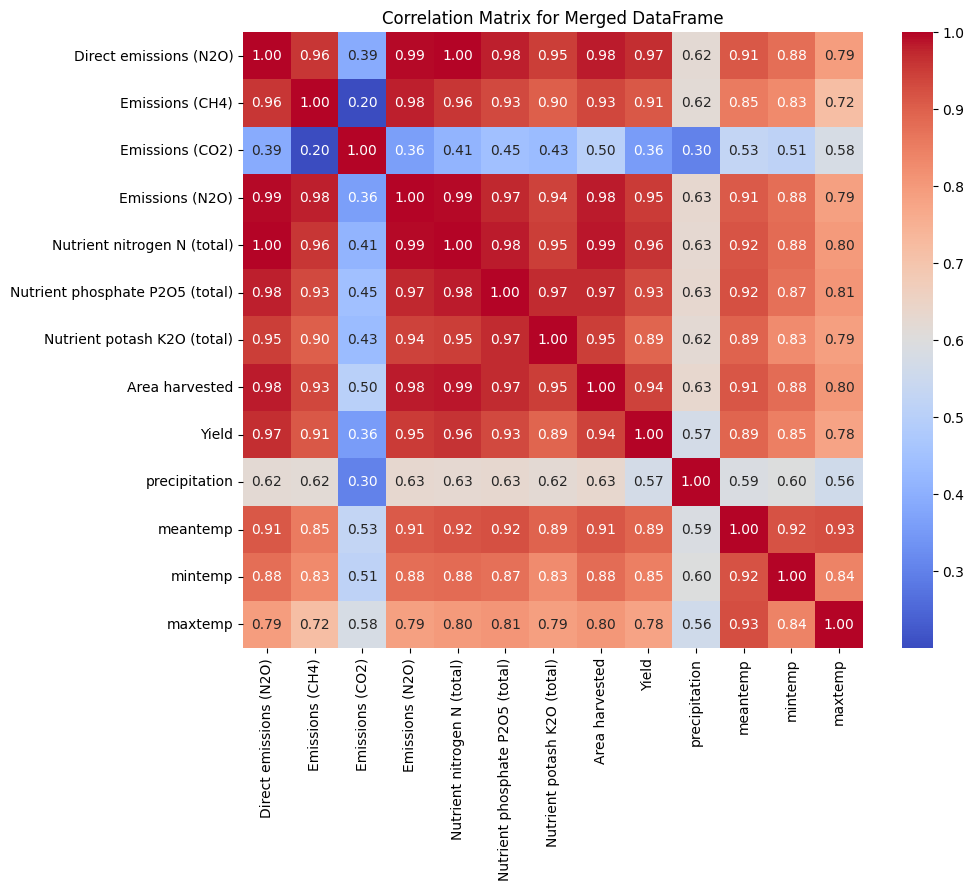

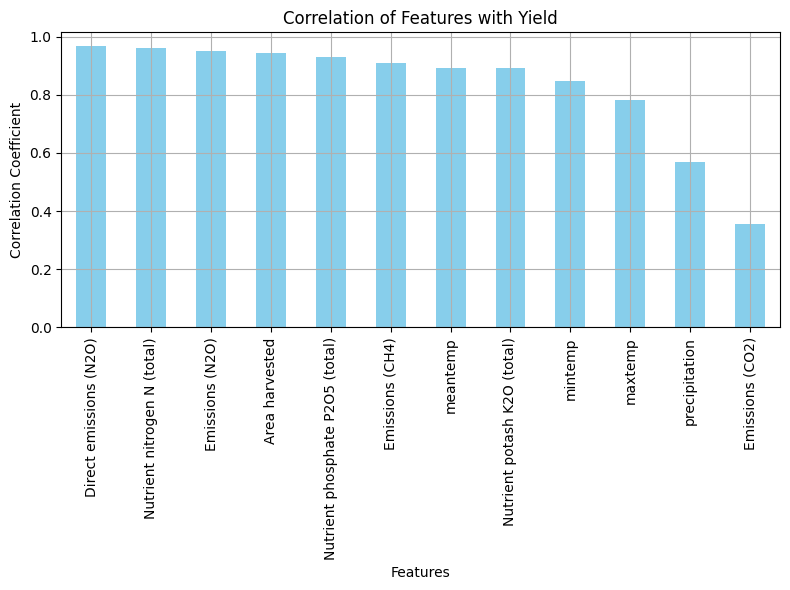

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Year' from the correlation matrix
correlation_matrix = merged_data.drop(columns=['Year']).corr()

# Filter correlations related to 'Yield'
yield_correlation = correlation_matrix['Yield'].sort_values(ascending=False)

# Display correlations with 'Yield'
print("Correlation of each column with 'Yield':")
print(yield_correlation)

# Plot the full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Merged DataFrame')
plt.show()

# Plot Yield correlations as bar chart
plt.figure(figsize=(8, 6))
yield_correlation.drop('Yield').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Yield')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features highly correlated with Yield
selected_features = [
    'Direct emissions (N2O)',
    'Nutrient nitrogen N (total)',
    'Emissions (N2O)',
    'Area harvested',
    'Nutrient phosphate P2O5 (total)',
    'Emissions (CH4)',
    'meantemp',
    'Nutrient potash K2O (total)',
    'mintemp',
    'maxtemp'
]

# Define X and y
X = merged_data[selected_features]
y = merged_data['Yield']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Display actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Yield:")
display(comparison_df)

MSE: 417630.0097789254
RMSE: 646.2429959225286
R^2: 0.9834855399422554

Actual vs Predicted Yield:


,Actual,Predicted
26,15322.1,15094.766376
35,16991.3,16546.539355
59,23677.2,23319.889348
28,15929.0,16619.990669
11,9809.9,8883.815172
2,8147.7,7520.154922
34,16272.0,16887.621552
58,23097.1,23685.735990
40,18362.7,18330.739029
22,13545.6,13814.212179


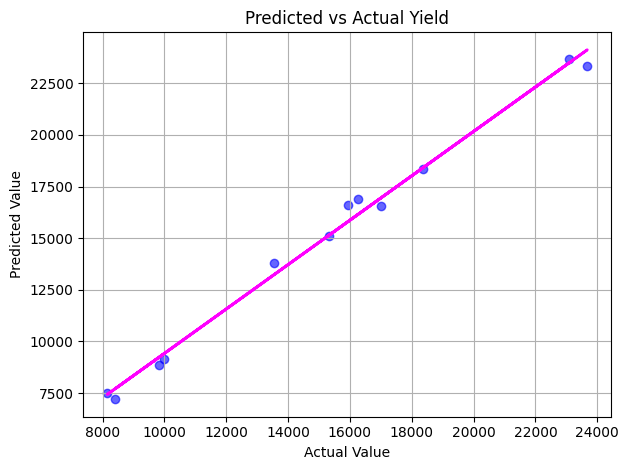

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Yield')

# Fit a linear trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#using other models

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Regressor:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

Random Forest Regressor:
MSE: 1003463.1118615776
RMSE: 1001.730059378063
R^2: 0.9603197780517965


Decision Tree regressor

Decision Tree Regressor:
MSE: 1946293.2699999998
RMSE: 1395.0961508082517
R^2: 0.9230371819183044


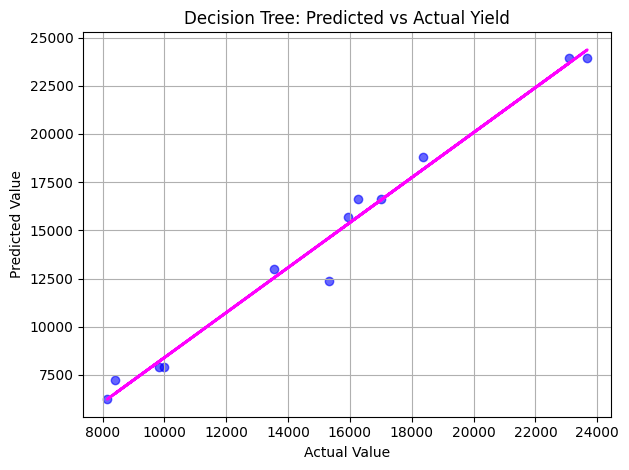

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=0)

# Train the model on the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
tree_y_pred = tree_regressor.predict(X_test)

# Evaluate the model
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_y_pred)

# Print evaluation metrics
print("Decision Tree Regressor:")
print(f"MSE: {tree_mse}")
print(f"RMSE: {tree_rmse}")
print(f"R^2: {tree_r2}")

# Plotting Actual vs Predicted values
plt.scatter(y_test, tree_y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Decision Tree: Predicted vs Actual Yield')

# Fit a trendline
z = np.polyfit(y_test, tree_y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

plt.grid(True)
plt.tight_layout()
plt.show()

Gradient boosting regressor

Gradient Boosting Regressor:
MSE: 1460853.0813705123
RMSE: 1208.6575533915768
R^2: 0.9422330788074897


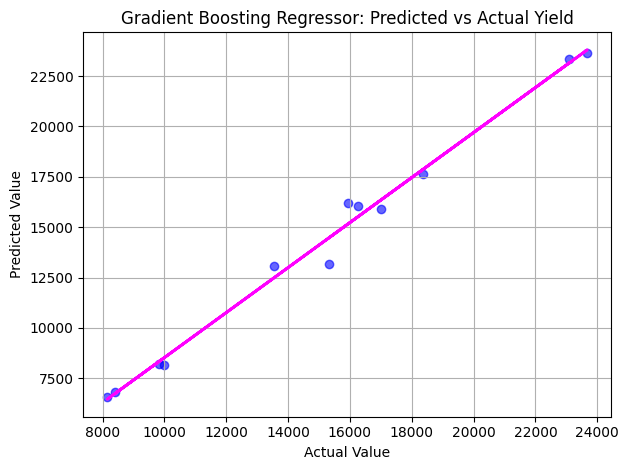

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbr.fit(X_train, y_train)

# Predict on test data
gbr_y_pred = gbr.predict(X_test)

# Evaluate the model
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print("Gradient Boosting Regressor:")
print(f"MSE: {gbr_mse}")
print(f"RMSE: {gbr_rmse}")
print(f"R^2: {gbr_r2}")

# Plotting Actual vs Predicted
plt.scatter(y_test, gbr_y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Gradient Boosting Regressor: Predicted vs Actual Yield')

# Fit a trendline
z = np.polyfit(y_test, gbr_y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

plt.grid(True)
plt.tight_layout()
plt.show()

xgboost Regressor

XGBoost Regressor:
MSE: 2178408.8227999997
RMSE: 1475.9433670707015
R^2: 0.9138585718190779


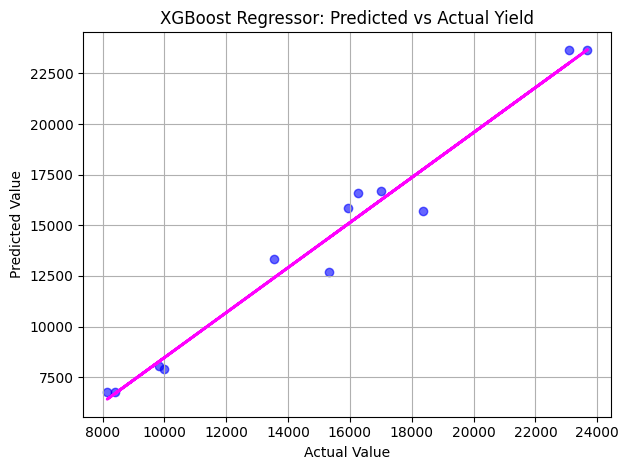

In [23]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb.fit(X_train, y_train)

# Predict on test data
xgb_y_pred = xgb.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Regressor:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R^2: {xgb_r2}")

# Plotting Actual vs Predicted
plt.scatter(y_test, xgb_y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('XGBoost Regressor: Predicted vs Actual Yield')

# Fit a trendline
z = np.polyfit(y_test, xgb_y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

plt.grid(True)
plt.tight_layout()
plt.show()


Support Vector Regressor (SVR)

Support Vector Regressor:
MSE: 17796825.219933327
RMSE: 4218.628357645804
R^2: 0.29625517235978494


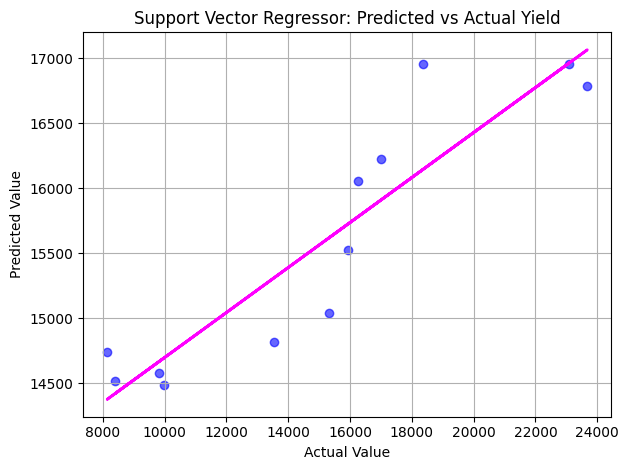

In [24]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Support Vector Regressor
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predict on test data
svr_y_pred = svr.predict(X_test_scaled)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_y_pred)

print("Support Vector Regressor:")
print(f"MSE: {svr_mse}")
print(f"RMSE: {svr_rmse}")
print(f"R^2: {svr_r2}")

# Plotting Actual vs Predicted
plt.scatter(y_test, svr_y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Support Vector Regressor: Predicted vs Actual Yield')

# Fit a trendline
z = np.polyfit(y_test, svr_y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

plt.grid(True)
plt.tight_layout()
plt.show()

#Comparing the models.

In [25]:
import pandas as pd

# Collect metrics from each model
model_metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
              'Gradient Boosting Regressor', 'XGBoost Regressor', 'Support Vector Regressor'],
    'R^2': [r2, tree_r2, rf_r2, gbr_r2, xgb_r2, svr_r2],  # R2 values from each model
    'RMSE': [rmse, tree_rmse, rf_rmse, gbr_rmse, xgb_rmse, svr_rmse]  # RMSE values from each model
}

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(model_metrics)

# Display the comparison DataFrame
print(metrics_df)



                         Model       R^2         RMSE
0            Linear Regression  0.983486   646.242996
1      Decision Tree Regressor  0.923037  1395.096151
2      Random Forest Regressor  0.960320  1001.730059
3  Gradient Boosting Regressor  0.942233  1208.657553
4            XGBoost Regressor  0.913859  1475.943367
5     Support Vector Regressor  0.296255  4218.628358


visualising the comparision

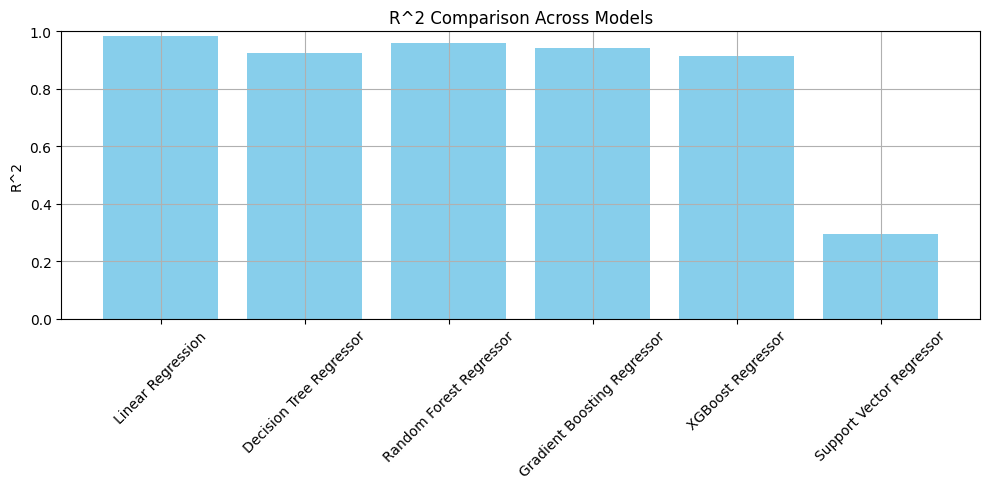

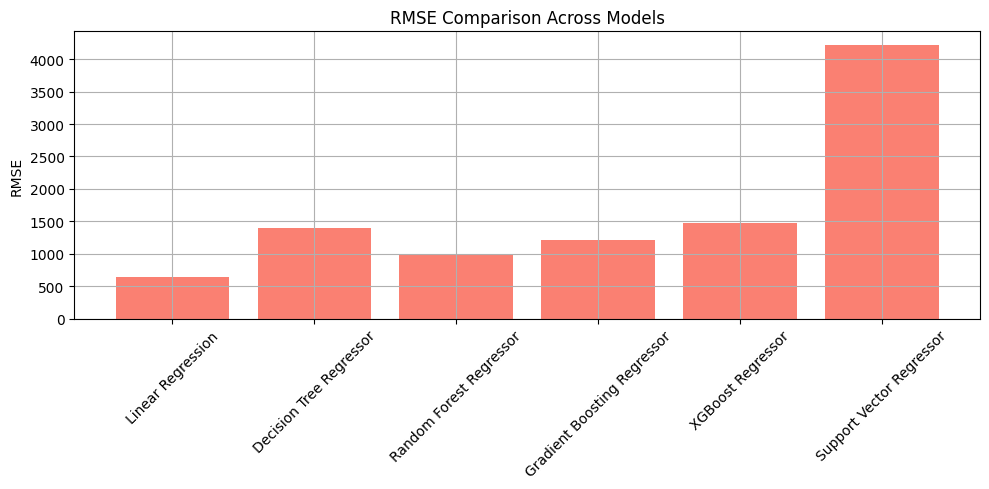

In [26]:
# Plot R^2 values
plt.figure(figsize=(10, 5))
plt.bar(metrics_df['Model'], metrics_df['R^2'], color='skyblue')
plt.title('R^2 Comparison Across Models')
plt.ylabel('R^2')
plt.ylim(0, 1)  # R^2 typically between 0 and 1
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='salmon')
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()